<h3>Methods Used</h3>
<ul>
<li>Descriptive Statistics</li>
<li>Inferential Statistics</li>
<li>Data Visualization</li>
<li>Machine Learning</li>
<li>Predictive Modeling</li>
</ul>

In [21]:
# standard library
import os, sys
sys.path.append(os.path.abspath(os.path.join("../..", "src")))

# pip packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# local packages
import d01_utils as stats
import d02_processing as preprocessor
import d03_models as model
import d04_visualization as vs

#matplotlib visualize in jupyter
%matplotlib inline

# Set Matplotlib Plots
plt.rcParams["figure.figsize"] = [20, 10]  # [width,length] unit = inches

<h3>Input Data</h3>

<p>The input data is an exported csv file from a broker that records the transactions of stock exchange on the US markets.</p>
<p>In this summary report, I will be using my personal data from the year of 2021 to current date as of writing this, July 1, 2021.</p>

In [22]:
orig_csv = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/01_raw/01_trade_activity.csv")
orig_csv.head()

,Unnamed: 0,Exec Time,Spread,Side,Qty,Pos Effect,Symbol,Exp,Strike,Type,Price,Net Price,Order Type
0,NaN,7/1/21 07:39:41,STOCK,SELL,-100,TO CLOSE,ATHE,NaN,NaN,STOCK,2.4301,2.4301,MKT
1,NaN,7/1/21 07:39:37,STOCK,SELL,-100,TO CLOSE,ATHE,NaN,NaN,STOCK,2.4600,2.4600,LMT
2,NaN,7/1/21 07:38:43,STOCK,BUY,100,TO OPEN,ATHE,NaN,NaN,STOCK,2.5199,2.5199,LMT
3,NaN,7/1/21 07:38:42,STOCK,BUY,100,TO OPEN,ATHE,NaN,NaN,STOCK,2.5177,2.5177,LMT
4,NaN,7/1/21 07:34:04,STOCK,SELL,-110,TO CLOSE,ATHE,NaN,NaN,STOCK,2.4800,2.4800,MKT


<h3>Preprocessing Data</h3>

<ul>
<li>Removing missing values, empty NaN columns, and unused data columns</li>
<li>Adding feature (Net Position)</li>
</ul>


In [23]:
intermediate_filter = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/02_intermediate/01_df_trade_activity.csv")
intermediate_filter.head()


,Exec Time,Qty,Symbol,Type,Net Price,Net Position
0,2021-07-01 07:39:41,-100,ATHE,STOCK,2.4301,-243.01
1,2021-07-01 07:39:37,-100,ATHE,STOCK,2.4600,-246.00
2,2021-07-01 07:38:43,100,ATHE,STOCK,2.5199,251.99
3,2021-07-01 07:38:42,100,ATHE,STOCK,2.5177,251.77
4,2021-07-01 07:34:04,-110,ATHE,STOCK,2.4800,-272.80


<h3>Processed Data</h3>

<ul>
<li>Company Name(ticker)</li>
<li>Cost of Trade</li>
<li>Quantity(number of shares) in the Trade</li>
<li>Duration of the Trade</li>
<li>Net gain or Net Loss</li>
<li>Number of Entrys(+1 +2 +3...shares etc) </li>
<li>Number of Exits(-1,-2,-3...shares etc) </li>
</ul>


In [24]:
processed = pd.read_csv(os.path.abspath(os.path.join("../..", "data")) + "/03_processed/01_df_trade_processed.csv")
processed.head()

,Unnamed: 0,ticker,profit_loss,cap,time_duration,positions,entry_pos,exit_pos,entrys,exits
0,0,ATHE,-14.75,503.76,140,4,2,2,"[Timestamp('2021-07-01 07:38:43'), Timestamp('...","[Timestamp('2021-07-01 07:39:41'), Timestamp('..."
1,1,ATHE,-6.34,279.14,103,3,2,1,"[Timestamp('2021-07-01 07:33:39'), Timestamp('...",[Timestamp('2021-07-01 07:34:04')]
2,2,MRIN,-0.92,36.54,139,2,1,1,[Timestamp('2021-07-01 07:08:05')],[Timestamp('2021-07-01 07:10:14')]
3,3,MRIN,-1.20,91.50,43,2,1,1,[Timestamp('2021-07-01 07:05:09')],[Timestamp('2021-07-01 07:05:34')]
4,4,MRIN,1.20,88.90,93,2,1,1,[Timestamp('2021-07-01 07:00:23')],[Timestamp('2021-07-01 07:01:10')]


<h3>Visualizing Processed Data w/Descriptive Statistics</h3>
<ul>
<li>Average (Median)</li>
<li>Frequency (Mode)</li>
<li>(Range)</li>
<li>Distribution (Box Plots)</li>
<li>Conditional Distribution (Linear Regression)</li>
</ul>


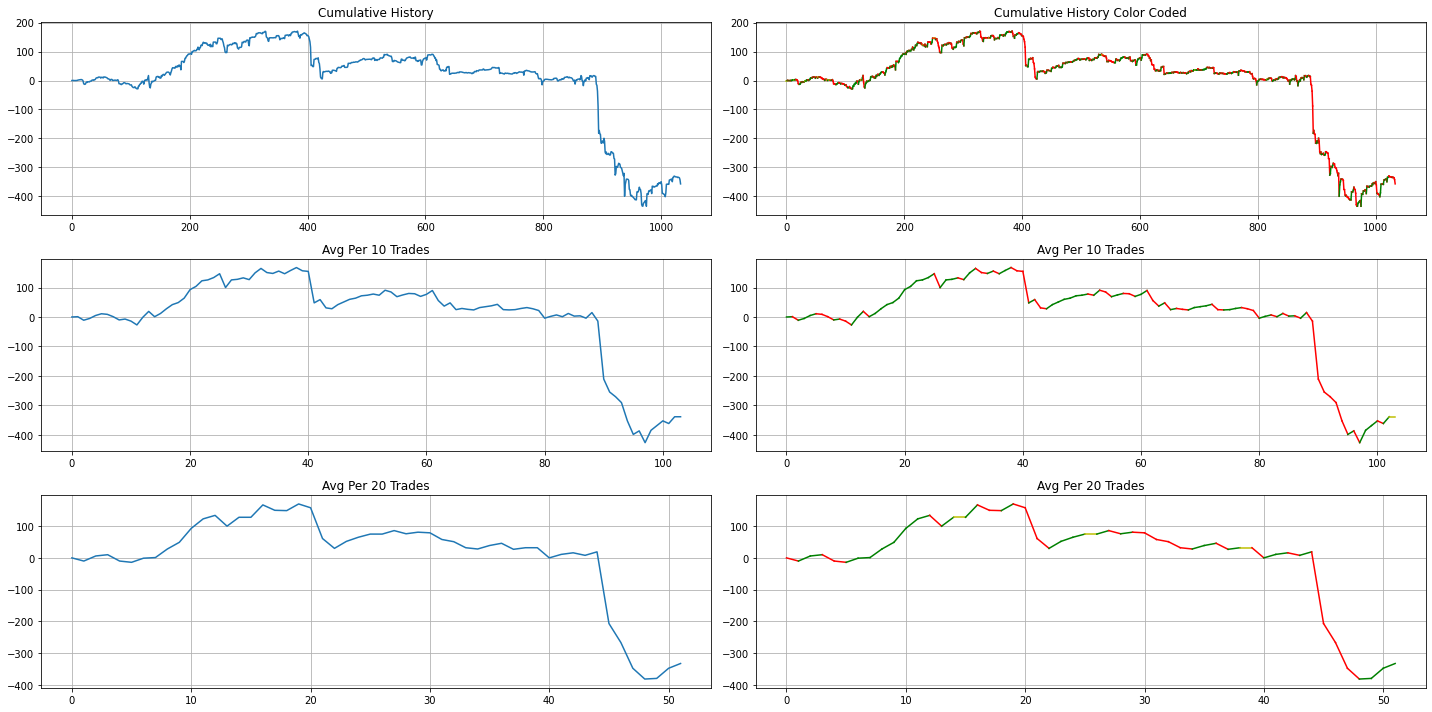

In [25]:
profit_loss = pd.Series(processed["profit_loss"].values[::-1])
# trend data
total_sum = stats.cumulative_sum(profit_loss)
total_sum_avg_10 = stats.cumulative_avg(profit_loss, avg=10)
total_sum_avg_20 = stats.cumulative_avg(profit_loss, avg=20)
fig, axis = plt.subplots(nrows=3, ncols=2)
# column_one: plot trends
vs.plot_trend(axis[0][0], data=total_sum, title="Cumulative History")
vs.plot_trend(axis[1][0], data=total_sum_avg_10, title="Avg Per 10 Trades")
vs.plot_trend(axis[2][0], data=total_sum_avg_20, title="Avg Per 20 Trades")
# column_two: plot trends w/color codes
vs.color_coded_trend(axis[0][1], total_sum, title="Cumulative History Color Coded")
vs.color_coded_trend(axis[1][1], data=total_sum_avg_10, title="Avg Per 10 Trades")
vs.color_coded_trend(axis[2][1], data=total_sum_avg_20, title="Avg Per 20 Trades")
# plt.show()
vs.vis_on(set=True)


In [26]:
# mean,standard deviation, minium, percantiles of distrubitons, maximum, minimum
processed[["profit_loss", "cap","time_duration","entry_pos","exit_pos"]].describe()

,profit_loss,cap,time_duration,entry_pos,exit_pos
count,1033.000000,1033.000000,1033.00000,1033.000000,1033.000000
mean,-0.345653,114.391123,102.89061,1.517909,1.494676
std,7.780846,143.338913,81.89777,0.922332,0.992326
min,-94.060000,1.010000,0.00000,1.000000,1.000000
25%,-1.000000,27.220000,55.00000,1.000000,1.000000
50%,-0.010000,69.930000,95.00000,1.000000,1.000000
75%,1.100000,138.450000,128.00000,2.000000,2.000000
max,43.000000,1144.500000,763.00000,8.000000,11.000000


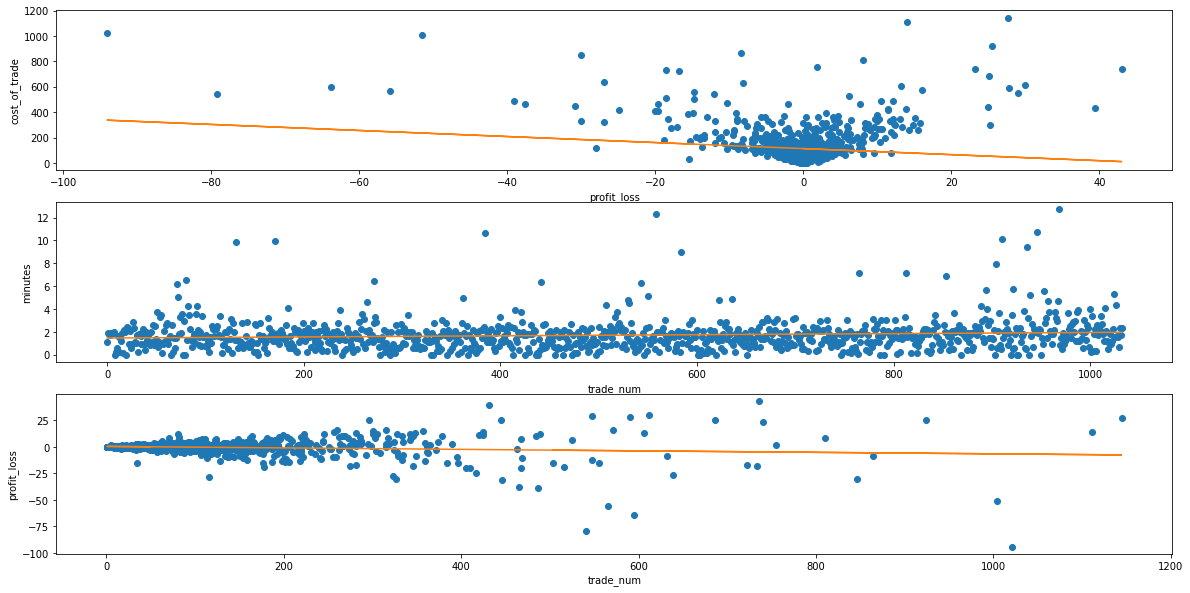

In [27]:
#Linear Regression w/Scatter Plots
capital_size = processed["cap"].values[::-1]
time_duration = processed["time_duration"].values[::-1]
fig2, axis2 = plt.subplots(nrows=3, ncols=1)
vs.linear_regression_scatter_plot(axis=axis2[0],x=profit_loss,y=capital_size,xl="profit_loss",yl="cost_of_trade",)
vs.linear_regression_scatter_plot(axis=axis2[1],x=range(len(time_duration)),y=np.true_divide(time_duration, 60),xl="trade_num",yl="minutes",)
vs.linear_regression_scatter_plot(axis=axis2[2], x=capital_size, y=profit_loss, xl="trade_num", yl="profit_loss")

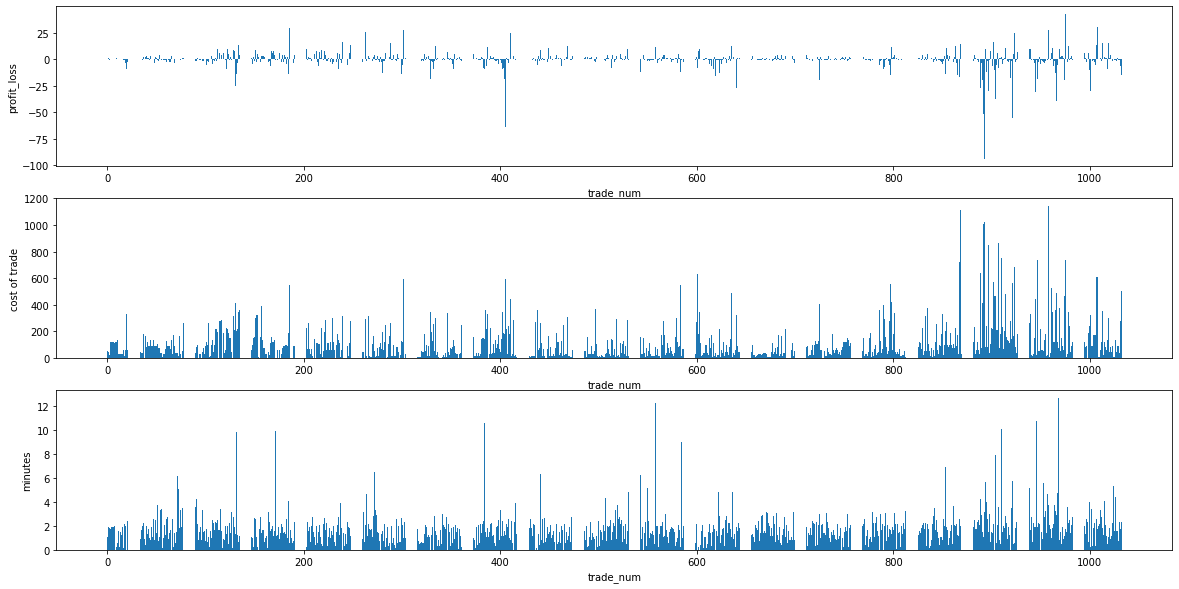

In [28]:
# Bar Charts
fig3, axis3 = plt.subplots(nrows=3, ncols=1)
vs.bar_chart(axis=axis3[0],x=range(len(profit_loss)),y=profit_loss,xl="trade_num",yl="profit_loss",)
vs.bar_chart(axis=axis3[1],x=range(len(capital_size)),y=capital_size,xl="trade_num",yl="cost of trade",)
vs.bar_chart(axis=axis3[2],x=range(len(time_duration)),y=np.true_divide(time_duration, 60),xl="trade_num",yl="minutes",)


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'profit_loss'}>,
        <AxesSubplot:title={'center':'cap'}>],
       [<AxesSubplot:title={'center':'time_duration'}>,
        <AxesSubplot:title={'center':'positions'}>,
        <AxesSubplot:title={'center':'entry_pos'}>],
       [<AxesSubplot:title={'center':'exit_pos'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

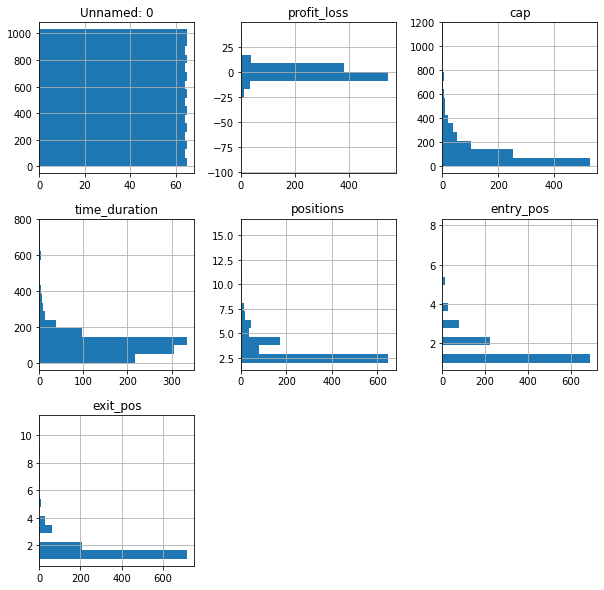

In [19]:
#Histograms
processed[processed.columns].hist(figsize=(10, 10),bins=16,grid=True,orientation="horizontal",)

<AxesSubplot:>

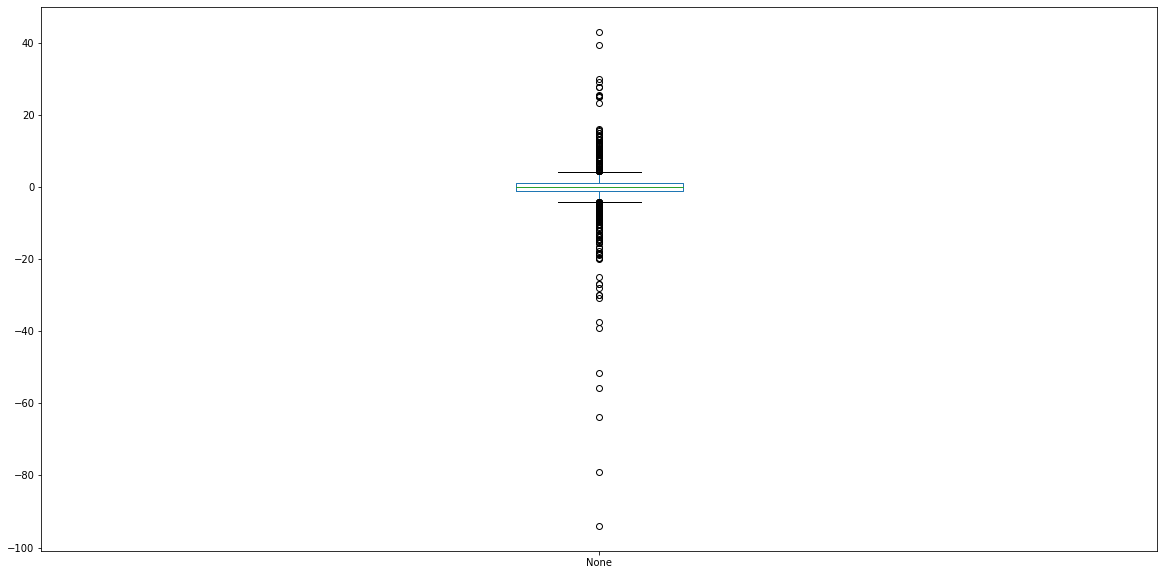

In [20]:
# Box Plots
profit_loss.plot.box()
